# Data Wrangle

All of these exercises should be done within your bayes-methodologies-exercises repository inside of a directory named clustering. For example, if the exercise directs you to create a file named myfile.py, you should have clustering/myfile.py in your repository.

If a file extension is specified, you should create that specific file. If there is not file extension specified, you may either create a python script or a jupyter notebook for the exercise.

## Zillow

For the following, iterate through the steps you would take to create functions: Write the code to do the following in a jupyter notebook, test it, convert to functions, then create the file to house those functions.

You will have a zillow.ipynb file and a helper file for each section in the pipeline.

### acquire & summarize

Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database

In [1]:
import pandas as pd
import numpy as np
from env import sql_database

In [2]:
# query = '''

# SELECT *
# FROM properties_2017
# JOIN (
# 	SELECT parcelid, `logerror`, max(transactiondate)
# 	FROM predictions_2017
# 	GROUP BY parcelid, logerror) predictions_2017 USING (parcelid)
# LEFT JOIN `typeconstructiontype` USING (typeconstructiontypeid)
# LEFT JOIN propertylandusetype USING (propertylandusetypeid)
# LEFT JOIN airconditioningtype USING (airconditioningtypeid)
# LEFT JOIN architecturalstyletype USING (architecturalstyletypeid)
# LEFT JOIN buildingclasstype USING (buildingclasstypeid)
# LEFT JOIN `heatingorsystemtype` USING (`heatingorsystemtypeid`)
# LEFT JOIN storytype USING (`storytypeid`)
# WHERE latitude IS NOT NULL AND longitude IS NOT NULL
# ;

# '''

# data_base_name = "zillow"

In [3]:
# df = sql_database(data_base_name, query)

In [4]:
# df.to_csv("zillow_data.csv")

In [5]:
df = pd.read_csv("zillow_data.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (37,38,62,65,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df = df.drop(columns="Unnamed: 0")

In [7]:
df.shape

(77575, 68)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 68 columns):
storytypeid                     50 non-null float64
heatingorsystemtypeid           49570 non-null float64
buildingclasstypeid             15 non-null float64
architecturalstyletypeid        206 non-null float64
airconditioningtypeid           25006 non-null float64
propertylandusetypeid           77575 non-null float64
typeconstructiontypeid          222 non-null float64
parcelid                        77575 non-null int64
id                              77575 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77575 non-null float64
bedroomcnt                      77575 non-null float64
buildingqualitytypeid           49809 non-null float64
calculatedbathnbr               76960 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6035 non-null float64
calculatedfinishedsquarefeet   

In [9]:
df.head()

,storytypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,propertylandusetypeid,typeconstructiontypeid,parcelid,id,basementsqft,...,censustractandblock,logerror,max(transactiondate),typeconstructiondesc,propertylandusedesc,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,storydesc
0,NaN,2.0,NaN,NaN,NaN,261.0,NaN,10711855,1087254,NaN,...,6.037113e+13,-0.007357,2017-07-07,NaN,Single Family Residential,NaN,NaN,NaN,Central,NaN
1,NaN,2.0,NaN,NaN,1.0,261.0,NaN,10711877,1072280,NaN,...,6.037113e+13,0.021066,2017-08-29,NaN,Single Family Residential,Central,NaN,NaN,Central,NaN
2,NaN,2.0,NaN,NaN,1.0,261.0,NaN,10711888,1340933,NaN,...,6.037113e+13,0.077174,2017-04-04,NaN,Single Family Residential,Central,NaN,NaN,Central,NaN
3,NaN,2.0,NaN,NaN,NaN,261.0,NaN,10711910,1878109,NaN,...,6.037113e+13,-0.041238,2017-03-17,NaN,Single Family Residential,NaN,NaN,NaN,Central,NaN
4,NaN,2.0,NaN,NaN,NaN,261.0,NaN,10711923,2190858,NaN,...,6.037113e+13,-0.009496,2017-03-24,NaN,Single Family Residential,NaN,NaN,NaN,Central,NaN


Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [10]:
def find_missing_values_rows(df):
    num_rows_missing = df.isnull().sum()
    ptc_rows_missing = df.isnull().sum() / df.shape[0]
    new_df = pd.DataFrame({"num_rows_missing": num_rows_missing, "pct_rows_missing": ptc_rows_missing})
    return new_df

In [11]:
new_df = find_missing_values_rows(df)
new_df

,num_rows_missing,pct_rows_missing
storytypeid,77525,0.999355
heatingorsystemtypeid,28005,0.361005
buildingclasstypeid,77560,0.999807
architecturalstyletypeid,77369,0.997345
airconditioningtypeid,52569,0.677654
...,...,...
airconditioningdesc,52569,0.677654
architecturalstyledesc,77369,0.997345
buildingclassdesc,77560,0.999807
heatingorsystemdesc,28005,0.361005


Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [12]:
def find_missing_rows(df):
    num_cols_missing = df.isnull().sum(axis=1)
    pct_cols_missing = df.isnull().sum(axis=1) / df.shape[0] 
    num_rows = df.isnull().sum()

    n_columns = pd.DataFrame({"num_cols_missing": num_cols_missing, "ptc_cols_missing": pct_cols_missing, "num_rows": num_rows})
    return n_columns

### Prepare

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 68 columns):
storytypeid                     50 non-null float64
heatingorsystemtypeid           49570 non-null float64
buildingclasstypeid             15 non-null float64
architecturalstyletypeid        206 non-null float64
airconditioningtypeid           25006 non-null float64
propertylandusetypeid           77575 non-null float64
typeconstructiontypeid          222 non-null float64
parcelid                        77575 non-null int64
id                              77575 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77575 non-null float64
bedroomcnt                      77575 non-null float64
buildingqualitytypeid           49809 non-null float64
calculatedbathnbr               76960 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6035 non-null float64
calculatedfinishedsquarefeet   

In [15]:
df.unitcnt.isnull().sum()

26872

In [16]:
df.unitcnt.value_counts()

1.0      47413
2.0       2031
4.0        726
3.0        529
6.0          1
45.0         1
237.0        1
42.0         1
Name: unitcnt, dtype: int64

In [17]:
df.groupby("unitcnt")["bedroomcnt", "bathroomcnt", "calculatedfinishedsquarefeet", "taxvaluedollarcnt"].agg(["max", "min"])

bedroomcnt      bathroomcnt      calculatedfinishedsquarefeet  \
               max  min         max  min                          max   
unitcnt                                                                 
1.0           11.0  0.0        13.0  0.0                      35640.0   
2.0           14.0  0.0        18.0  0.0                      18654.0   
3.0           13.0  0.0        10.0  0.0                      18197.0   
4.0           16.0  0.0         9.0  0.0                       6862.0   
6.0            4.0  4.0         3.0  3.0                       1582.0   
42.0           0.0  0.0         0.0  0.0                      10422.0   
45.0           0.0  0.0         0.0  0.0                       3709.0   
237.0          0.0  0.0         0.0  0.0                       3472.0   

                 taxvaluedollarcnt             
             min               max        min  
unitcnt                                        
1.0        152.0        25381250.0     1000.0  
2.0        432.0        49061236.0    18998.0  
3.0        384.0         4906845.0    29435.0  
4.0       1136.0         5373376.0    28437.0  
6.0       1582.0          233437.0   233437.0  
42.0     10422.0          561320.0   561320.0  
45.0      3709.0          329438.0   329438.0  
237.0     3472.0         1045707.0  1045707.0

In [18]:
df.groupby(["unitcnt", "propertylandusedesc"]).propertylandusedesc.count()

unitcnt  propertylandusedesc                     
1.0      Commercial/Office/Residential Mixed Used        8
         Condominium                                 11527
         Cooperative                                    29
         Duplex (2 Units, Any Combination)              21
         Mobile Home                                    53
         Planned Unit Development                     1940
         Residential General                            10
         Single Family Residential                   33817
         Townhouse                                       6
         Triplex (3 Units, Any Combination)              2
2.0      Condominium                                     5
         Duplex (2 Units, Any Combination)            1981
         Quadruplex (4 Units, Any Combination)           2
         Residential General                             1
         Single Family Residential                      29
         Triplex (3 Units, Any Combination)             13
3.0   

It seems that most signle unit properties have a property land use description of either "comdominum" or "Single Family Residential". While other unitcnt also have these descriptions, they are by far the minority, and would be ok dropping them. This is great because there are no null values for property land use.

In [19]:
df[df["unitcnt"].isnull()].groupby("propertylandusedesc")["bedroomcnt"].count()

propertylandusedesc
Cluster Home                                    335
Commercial/Office/Residential Mixed Used          3
Condominium                                    7806
Duplex (2 Units, Any Combination)                18
Manufactured, Modular, Prefabricated Homes       59
Mobile Home                                      21
Planned Unit Development                          7
Quadruplex (4 Units, Any Combination)             3
Residential General                              27
Single Family Residential                     18592
Triplex (3 Units, Any Combination)                1
Name: bedroomcnt, dtype: int64

Here we see - from the values that are missing - that the majority of values are "Single Family Residential" or "Condominium". I will keep these rows, and assume they are single unit homes, and drop the rest. 

In [20]:
def impude_unit_cnt(df):
    if df.propertylandusedesc == "Condominium" or df.propertylandusedesc == "Single Family Residential":
        return 1
    else:
        return 0

In [21]:
df.unitcnt = df.unitcnt.fillna(df.apply(lambda col: impude_unit_cnt(col), axis = 1))

In [22]:
df.unitcnt.value_counts()

1.0      73811
2.0       2031
4.0        726
3.0        529
0.0        474
6.0          1
45.0         1
237.0        1
42.0         1
Name: unitcnt, dtype: int64

In [23]:
df = df[df.unitcnt == 1]

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

* The input:
    * A dataframe
    * A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
     * A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).



* The output:
    * The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [24]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    df.dropna(axis=1, thresh= (prop_required_column * df.shape[0]), inplace=True)
    df.dropna(thresh= (prop_required_row * df.shape[1]), inplace=True)
    return df

In [25]:
df = handle_missing_values(df, .8, .8)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73794 entries, 0 to 77573
Data columns (total 30 columns):
propertylandusetypeid           73794 non-null float64
parcelid                        73794 non-null int64
id                              73794 non-null int64
bathroomcnt                     73794 non-null float64
bedroomcnt                      73794 non-null float64
calculatedbathnbr               73585 non-null float64
calculatedfinishedsquarefeet    73664 non-null float64
finishedsquarefeet12            73458 non-null float64
fips                            73794 non-null float64
fullbathcnt                     73585 non-null float64
latitude                        73794 non-null float64
longitude                       73794 non-null float64
lotsizesquarefeet               65622 non-null float64
propertycountylandusecode       73794 non-null object
rawcensustractandblock          73794 non-null float64
regionidcity                    72351 non-null float64
regionidcounty  

Decide how to handle the remaining missing values:

* Fill with constant value.
* Impute with mean, median, mode.
* Drop row/column

In [26]:
bath = df.bathroomcnt != 0
bedroom = df.bedroomcnt != 0
df = df[bedroom & bath]

Take-aways:

* I know from experience that `calculatedbathnbr` is the same as `bathroomcnt`, so I ok dropping that column all together.
* I don't want to drop any of the `calcualtedfinishedsquarefeet`, so I will try to find the mean for those values. Same goes for `finishedsquarefeet12`
* I am not as interested in `fullbathcnt`, so I can drop the column.
* I will impude the `lotsizesquarefeet` with the mean.

In [27]:
df.calculatedfinishedsquarefeet = df.calculatedfinishedsquarefeet.dropna()

In [28]:
df.lotsizesquarefeet = df.lotsizesquarefeet.fillna(df.lotsizesquarefeet.mean())

In [29]:
df.regionidcity = df.regionidcity.fillna(value=df.regionidcity.mode()[0])

In [30]:
df.censustractandblock = df.censustractandblock.fillna(value=df.censustractandblock.mode()[0])

In [31]:
df = df.dropna()

In [32]:
df.isnull().sum()

propertylandusetypeid           0
parcelid                        0
id                              0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
max(transactiondate)            0
propertylandus

# Exercise 2

* Acquire data from mall_customers.customers in mysql database.
* Summarize data (include distributions and descriptive statistics).
* Detect outliers using IQR.
* Split data (train-test-split).
* Encode categorical columns using a one hot encoder.
* Handles missing values.
* Scaling

In [33]:
query = '''

SELECT *
FROM customers

'''

data_base_name = "mall_customers"

In [34]:
df = sql_database(data_base_name, query)

In [35]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
customer_id       200 non-null int64
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


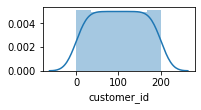

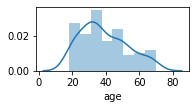

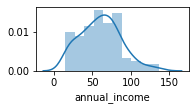

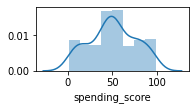

In [37]:
for i in range(0,4):
    df_int = df.select_dtypes("int")
    plt.subplot(3,2,i+1)
    sns.distplot(df_int.iloc[:,i])
    plt.show()

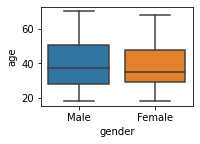

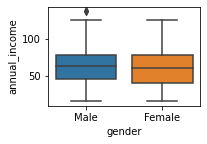

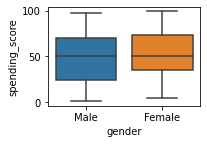

In [38]:
for i in range(1,4):
    columns= df.drop(columns="gender")
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x="gender", y=columns.columns[i])
    plt.show()

* There is an outlier when it comes to annual_income

In [39]:
def get_upper_outliers(s, k):
    '''
    Given a series and a cutoff value, k, returns the upper outliers for the
    series.

    The values returned will be either 0 (if the point is not an outlier), or a
    number that indicates how far away from the upper bound the observation is.
    '''
    q1, q3 = s.quantile([.25, .75])
    iqr = q3 - q1
    upper_bound = q3 + k * iqr
    return s.apply(lambda x: max([x - upper_bound, 0]))

def add_upper_outlier_columns(df, k):
    '''
    Add a column with the suffix _outliers for all the numeric columns
    in the given dataframe.
    '''
    # outlier_cols = {col + '_outliers': get_upper_outliers(df[col], k)
    #                 for col in df.select_dtypes('number')}
    # return df.assign(**outlier_cols)

    for col in df.select_dtypes('number'):
        df[col + '_outliers'] = get_upper_outliers(df[col], k)

    return df

In [40]:
# df_outliers = add_upper_outlier_columns(df, k=1.5)
# df_outliers.head()

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# Split
train, test = train_test_split(df, random_state=123, train_size=.8)

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [44]:
# Encode
def ohe(col, X_train, X_test):
    ''' 
    Function to fit and transform a OneHotEncoder to encode columns and replace the new values in our train, validate, and test df
    '''
    # Creates and fits that encoder
    encoder = OneHotEncoder().fit(X_train[[col]])
    
    # Transforms and replaced the new columns back to the dataframes
    m = encoder.transform(X_train[[col]]).todense()
    X_train = pd.concat([X_train, pd.DataFrame(m, columns= col +"_"+ encoder.categories_[0], index=X_train.index)], axis = 1)
    
    m = encoder. transform(X_test[[col]]).todense()
    X_test = pd.concat([X_test, pd.DataFrame(m, columns=col +"_"+ encoder.categories_[0], index = X_test.index)], axis = 1)
    
    X_train.drop(columns=col,inplace=True)
    X_test.drop(columns=col, inplace=True)
    
    return X_train, X_test

In [45]:
train, test = ohe("gender", train, test)

In [46]:
def return_values(scaler, train, test):
    '''
    Helper function used to updated the scaled arrays and transform them into usable dataframes
    '''
    train_scaled = pd.DataFrame(scaler.transform(train), columns=train.columns.values).set_index([train.index.values])
    test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns.values).set_index([test.index.values])
    return scaler, train_scaled, test_scaled

# Linear scaler
def min_max_scaler(train, test):
    '''
    Helper function that scales that data. Returns scaler, as well as the scaled dataframes
    '''
    scaler = MinMaxScaler().fit(test)
    scaler, train_scaled, test_scaled = return_values(scaler, train, test)
    return scaler, train_scaled, test_scaled

In [47]:
train_scaled = train.drop(columns=["gender_Male", "gender_Female"])
test_scaled = test.drop(columns=["gender_Male", "gender_Female"])

_, train_scaled, test_scaled = min_max_scaler(train_scaled, test_scaled)

train_scaled["gender_male"] = train["gender_Male"]
train_scaled["gender_female"] = train["gender_Female"]

test_scaled["gender_male"] = test["gender_Male"]
test_scaled["gender_female"] = test["gender_Female"]

In [48]:
train_scaled

,customer_id,age,annual_income,spending_score,gender_male,gender_female
24,0.108108,0.714286,0.127907,0.134021,0.0,1.0
150,0.789189,0.489796,0.709302,0.164948,1.0,0.0
114,0.594595,-0.020408,0.558140,0.484536,0.0,1.0
33,0.156757,-0.020408,0.186047,0.938144,1.0,0.0
23,0.102703,0.244898,0.093023,0.742268,1.0,0.0
...,...,...,...,...,...,...
17,0.070270,0.020408,0.046512,0.670103,1.0,0.0
98,0.508108,0.591837,0.511628,0.422680,1.0,0.0
66,0.335135,0.489796,0.360465,0.505155,0.0,1.0
126,0.659459,0.489796,0.627907,0.350515,1.0,0.0


In [49]:
import wrangle_zillow

In [50]:
zillow = wrangle_zillow.read_zillow()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (37,38,62,65,66,68) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [51]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77575 entries, 0 to 77574
Data columns (total 68 columns):
storytypeid                     50 non-null float64
heatingorsystemtypeid           49570 non-null float64
buildingclasstypeid             15 non-null float64
architecturalstyletypeid        206 non-null float64
airconditioningtypeid           25006 non-null float64
propertylandusetypeid           77575 non-null float64
typeconstructiontypeid          222 non-null float64
parcelid                        77575 non-null int64
id                              77575 non-null int64
basementsqft                    50 non-null float64
bathroomcnt                     77575 non-null float64
bedroomcnt                      77575 non-null float64
buildingqualitytypeid           49809 non-null float64
calculatedbathnbr               76960 non-null float64
decktypeid                      614 non-null float64
finishedfloor1squarefeet        6035 non-null float64
calculatedfinishedsquarefeet   

In [60]:
df = wrangle_zillow.data_prep(zillow, cols_to_remove=["calculatedbathnbr"])

In [56]:
df.buildingqualitytypeid.value_counts()

8.0     14272
6.0     12739
4.0      8034
7.0      5785
9.0      2210
5.0      1282
11.0      899
10.0      297
12.0      113
3.0        87
1.0         6
Name: buildingqualitytypeid, dtype: int64